# 통계 분석 방법

##1.중심 극한 정리

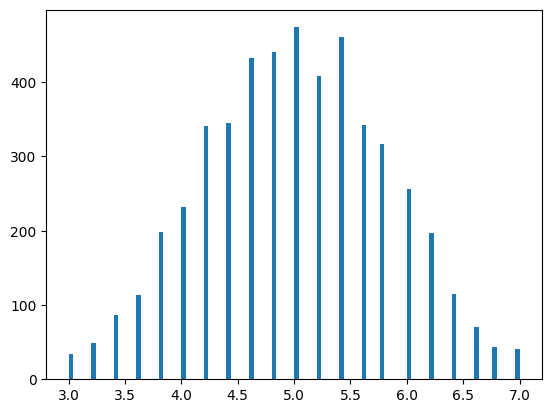

In [ ]:
# 모집단 갯수 range(1,100000)
# 표본의 크기 100개
# 샘플링 5000번 시행
# 평균의 위치, 분산 모양 파악
# 표본의 크기가 크면 N(모평균, 모분산/n)
# 표본이 크기 n이 커질수록 편차가 줄어들죠. 정규분포에 가까와진다.

import matplotlib.pyplot as plt
import numpy as np
import random

avg_values = []
for i in range(1,5000) :
    samples = random.sample(range(1,10), 5)
    x = np.mean(samples) 
    avg_values.append(x)

plt.hist(avg_values, bins=100)
plt.show()

##2.t 검정
- 집단 간 평균 차이 검정


### 2-1 One Sample t-test(단일표본 t검정)
- 표본이 하나일 때, 모집단의 평균과 표본집단의 평균 사이에 차이가 있는지를 검증하는 방법
- scipy.stats 의 ttest_1samp(a, popman) 이용

In [ ]:
# bus_wait_time.csv

import pandas as pd

df = pd.read_csv('/content/bus_wait_time.csv')
df

,waittime
0,14.685862
1,14.099321
2,15.074540
3,14.063753
4,15.004121
...,...
93541,14.596845
93542,15.267857
93543,14.870376
93544,15.719782


In [ ]:
# 평균 
df['waittime'].mean()

15.00011123283454

In [ ]:
# 가설 설정
# h0 : 뮤 = 15min이다
# h1 : 뮤는 15min이 아니다

from scipy import stats

# ttest_1samp(sample observation, 귀무가설의 기대값)
stats.ttest_1samp(df['waittime'], popmean=15)

# 유의수준 0.05로 했을 때 p-value = 0.95 즉 0.95 > 0.05 -> 귀무가설 채택
# 따라서 버스의 waittime은 15min이다
# 양측검정


TtestResult(statistic=0.058841382013004526, pvalue=0.9530785731500322, df=93545)

### [실습]
한 자동차 회사에서 새로 생산된 자동차의 연비가 리터당 20Km라고 한다.
이 회사의 주장이 정당한지 확인하기 위해 자동차 20대를 임의로 선택하여 조사해 본 결과가 아래와 같다. 자동차 회사의 주장이 옳은가. 아니면 이 자종의 주행거리가 20Km보다 작다고 할 수 있는가.



In [ ]:
# car_fuel.csv
# 가설 설정 -> 검정 -> 결과해석 
# 단층검정일때는 양측검정의 p-value/2 해줘야합니다.


In [ ]:
import pandas as pd
from scipy import stats

df_car = pd.read_csv('/content/car_fuel.csv')
sample_data = df_car['Y']
t_statistic, p_value = stats.ttest_1samp(sample_data, 20, )
print(p_value)

# one-tailed t-test (왼쪽 꼬리)
p_value_one_tailed = p_value / 2  # 특별히 p-value를 2로 나눠야 된다.

# 결과 출력
alpha = 0.05  # 유의수준 설정
print(f"t-statistic: {t_statistic}, one-tailed p-value: {p_value_one_tailed}")

if p_value_one_tailed < alpha:
    print("귀무가설을 기각")
else:
    print("귀무가설을 기각할 근거가 없습니다")


t_statistic, p_value = stats.ttest_1samp(sample_data, 20, alternative='less')
print(p_value)    

0.03148862807800943
t-statistic: -2.322137388820601, one-tailed p-value: 0.015744314039004715
귀무가설을 기각
0.015744314039004715


### 2-2 Two Sample t-test(독립표본 t검정)
- 서로 다른 두 개의 그룹 간 평균 검정을 위한 방법
- scipy.stats 의 ttest_ind(x, y) 함수 이용


- '새로운 강의 방식이 학생들의 독해력 향상에 도움을 주는가?'
- 새로운 강의 방식에 의한 평균이 기존의 강의방식에 의한 평균보다 큰지 검정
- 16명의 학생들을 8명씩 랜덤 추출하여 두집단으로 나눔
- 한 집단에는 기존 방식(old), 한 집단에는 새로운 방식(new)

### H0 : u1 = u2 , H1: u1 > u2 

In [ ]:
import pandas as pd
df = pd.read_csv('Reading.csv')
df

,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69
5,6,New,81
6,7,New,71
7,8,New,78
8,9,Old,65
9,10,Old,70


In [ ]:
# boxplot
import seaborn as sns
sns.boxplot(x='Group', y='Score', data=df)

<Axes: xlabel='Group', ylabel='Score'>

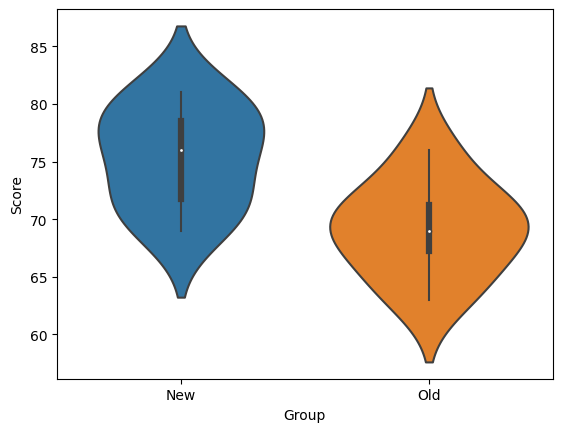

In [ ]:
# violinplot
sns.violinplot(x='Group', y='Score', data=df)

In [ ]:
# describe()
df.groupby('Group').describe()['Score']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
New,8.0,75.375,4.373214,69.0,71.75,76.0,78.50,81.0
Old,8.0,69.125,4.086126,63.0,67.25,69.0,71.25,76.0


In [ ]:
# 집단 나누기
new = df[df['Group']=='New']
old = df[df['Group']=='Old']
new.shape, old.shape

((8, 3), (8, 3))

In [ ]:
# 양측검정
# stats.ttest_ind

stat , pvalue = stats.ttest_ind(new.Score, old.Score)
print("pvalue ==> ", pvalue/2)


pvalue ==>  0.005235372094016561


In [ ]:
# 결과해석
# H0 : New와 old의 평균은 같다
# H1 : New > old
# 유의수준 0.05하에서 p-value 가 0005로 유의수준보다 작으므로 귀무가설 기각, 대립가설 지지
# 따라서 New가 old보다 score평균이 높다고 할 수 있다.


In [ ]:
stat , pvalue = stats.ttest_ind(new.Score, old.Score, alternative='greater')
print("pvalue ==> ", pvalue)

pvalue ==>  0.005235372094016561


### [실습] 

어떤 기업연구가는 신용등급이 FP(finantial performance)지표에 영향을 줄 것이라는 생각을 하고 있다. 이를 알아보기 위해 신용등급이 좋은 12개 회사와 나쁜 12개의 회사를 임의로 선택하여 FP지표를 조사하고 다음 데이터를 얻었다.
신용등급에 따른 FP지표의 모평균에 차이가 있는지를 유의수준 5%하에서 검정하시요
- 각각의 평균, 표준편차, t값, p-value, 해석

In [ ]:
# fp_goodbad.csv
df = pd.read_csv("/content/fp_goodbad.csv")
df

,ID,X,Y
0,1,Good,0.58
1,2,Good,2.80
2,3,Good,2.77
3,4,Good,3.50
4,5,Good,2.67
5,6,Good,2.97
6,7,Good,2.18
7,8,Good,3.24
8,9,Good,1.49
9,10,Good,2.19


In [ ]:
good = df[df.X=='Good']
bad = df[df.X=='Bad ']
stats.ttest_ind(bad.Y, good.Y)

Ttest_indResult(statistic=-5.469733218713341, pvalue=1.702783686465887e-05)

In [ ]:
df.groupby('X').describe()

ID                                                     Y            \
     count  mean       std   min    25%   50%    75%   max count      mean   
X                                                                            
Bad   12.0  18.5  3.605551  13.0  15.75  18.5  21.25  24.0  12.0  0.875000   
Good  12.0   6.5  3.605551   1.0   3.75   6.5   9.25  12.0  12.0  2.471667   

                                                   
           std   min     25%    50%     75%   max  
X                                                  
Bad   0.628657  0.07  0.4150  0.805  1.0975  2.28  
Good  0.792038  0.58  2.1875  2.685  2.8425  3.50

### 2-3 Paired t-test(대응표본 t검정)
- 연관된 두 집단의 차이 에 대한 단일 표본의 평균 검정을 진행하는 방법
- scipy.stats 의 ttest_rel(x, y) 
- 실험 단위를 동질적인 쌍으로 묶은 다음 각 쌍에 대해 랜덤하게 두 처리를 적용하고, 각 쌍에서 얻어진 반응 값의 차이를 이용하여 두 모평균 비교


대응표본 t- 검정사례
- '컴퓨터 교육 실시하기 전과 후의 성적 차이가 있는가?'
- 15명의 학생에게 통계학 시험 성적 전후 비교

In [ ]:
# 'Paired.csv'

df = pd.read_csv('/content/Paired.csv')
df

,ID,Pretest,Posttest
0,1,80,82
1,2,73,71
2,3,70,95
3,4,60,69
4,5,88,100
5,6,84,71
6,7,65,75
7,8,37,60
8,9,91,95
9,10,98,99


<Axes: >

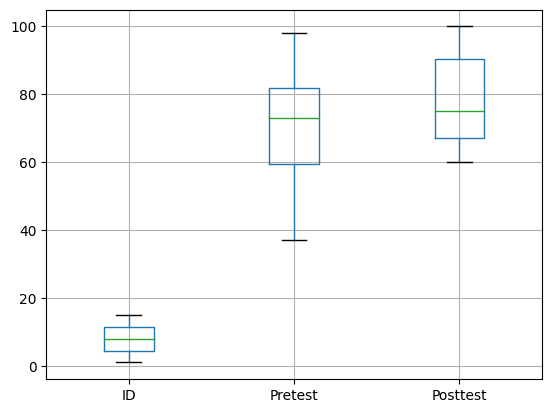

In [ ]:
# boxplot

df.boxplot()

In [ ]:
df.describe()

,ID,Pretest,Posttest
count,15.000000,15.000000,15.000000
mean,8.000000,70.266667,78.200000
std,4.472136,18.041487,14.313829
min,1.000000,37.000000,60.000000
25%,4.500000,59.500000,67.000000
50%,8.000000,73.000000,75.000000
75%,11.500000,82.000000,90.500000
max,15.000000,98.000000,100.000000


In [ ]:
# diff 의 통계값

df['Diff'] = df.Pretest - df.Posttest
df.describe()

,ID,Pretest,Posttest,Diff
count,15.000000,15.000000,15.000000,15.000000
mean,8.000000,70.266667,78.200000,-7.933333
std,4.472136,18.041487,14.313829,9.931671
min,1.000000,37.000000,60.000000,-25.000000
25%,4.500000,59.500000,67.000000,-12.500000
50%,8.000000,73.000000,75.000000,-7.000000
75%,11.500000,82.000000,90.500000,-2.500000
max,15.000000,98.000000,100.000000,13.000000


<Axes: xlabel='Diff', ylabel='Count'>

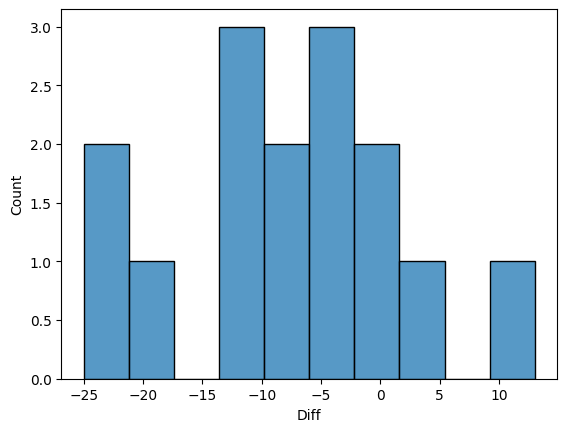

In [ ]:
# diff 의 분포 확인
sns.histplot(df.Diff, bins=10)

In [ ]:
# stats.ttest_rel

stat, pvalue = stats.ttest_rel(df.Pretest, df.Posttest)  # 양측검정
print("pvalue ==> ", pvalue/2)

pvalue ==>  0.003965461614513267


In [ ]:
# h0 : pretest 와 posttest가 차이가 없다 (d=0)
# h1 : pretest 가 posttest보다 작다 
# 유의수준 0.05하에서 pvalue가 0.0039로 0.05보다 작으므로 귀무가설을 기각
# 따라서 pretest가 posttest보다 작다고 할 수 있다.


### [실습]
사슴의 앞다리 와 뒷다리에 관한 데이터 

- Foreleg = [142,144,142,149,142,140,144,146,150,148]
- Hindleg = [138,147,143,143,136,136,139,141,145,146]

#### (a) 이 데이터에 대해서 연구자가 어떤 생각으로 표본을 생산하게 되었는지 서술하여라.

In [ ]:
# 앞다리, 뒷다리 길이가 같은지 확인하기 위해서

In [ ]:
Foreleg = [142,144,142,149,142,140,144,146,150,148]
Hindleg = [138,147,143,143,136,136,139,141,145,146]

df = pd.DataFrame({"Foreleg" :Foreleg , 
                   "Hindleg" :Hindleg })
df
# column, index, value 

,Foreleg,Hindleg
0,142,138
1,144,147
2,142,143
3,149,143
4,142,136
5,140,136
6,144,139
7,146,141
8,150,145
9,148,146


#### (b) - a에서 서술한 내용에 대응되는 귀무가설과 대립가설을 제시하여라.



In [ ]:
# H0 : 앞다리 뒷다리 길이가 같다
# H1 : 앞다리, 뒷다리 길이가 다르다

#### (c) - (b)의 통계적 가설에 대해 생각할 수 있는 두 가지 유형의 오류의 내용을 구체적으로 설명하여라.


In [ ]:
# 1종 오류 : 길이가 같은데 다르다고 판정
# 2종 오류 : 길이가 다른데 같다고 판정

#### (d) - 다리길이의 차이를 계산하여라 (diff)


In [ ]:
df['diff'] = df['Foreleg'] - df['Hindleg']
df

,Foreleg,Hindleg,diff
0,142,138,4
1,144,147,-3
2,142,143,-1
3,149,143,6
4,142,136,6
5,140,136,4
6,144,139,5
7,146,141,5
8,150,145,5
9,148,146,2


In [ ]:
df.diff(axis=1)

,Foreleg,Hindleg,diff
0,NaN,-4,-134
1,NaN,3,-150
2,NaN,1,-144
3,NaN,-6,-137
4,NaN,-6,-130
5,NaN,-4,-132
6,NaN,-5,-134
7,NaN,-5,-136
8,NaN,-5,-140
9,NaN,-2,-144


#### (e) - 변수 diff에 대한 기술통계량을 출력하고 그 결과에 기초하여 이 데이터의 전반적인 내용을 요약하여라.

In [ ]:
df['diff'].describe()

count    10.000000
mean      3.300000
std       3.056868
min      -3.000000
25%       2.500000
50%       4.500000
75%       5.000000
max       6.000000
Name: diff, dtype: float64

In [ ]:
# 평균차이 3.3, 표준편차는 3.05이고, 중위수가 4.5이고 가장 큰 차이는 6,

#### (f) boxplot을 이용하여 변수 diff 분포의 형태를 묘사하여라


In [ ]:
plt.boxplot(df['diff'])
plt.show()

#### (g) - (b)에 규정된 관심대상의 가설을 검정하고, 그 결과를 서술하여라.

In [ ]:
stats.ttest_rel(Foreleg, Hindleg)

TtestResult(statistic=3.413793103448276, pvalue=0.007703223347263766, df=9)

In [ ]:
# 유의수준 0.05하에 p-value가 0.007로 0.05보다 작으로 귀무가설 기각, 대립가설 채택
# 따라서 Foreleg, Hindleg는 차이가 있다.

## 3.카이제곱 독립성 검정
- 서로 연관성이 있는가? (독립적인가?)
- scipy.stats 의 chi2_contingency() 함수 이용


- 2차원 교차표(분할표) 작성 - Prefer 데이터 

In [ ]:
# h0 : Agegroup과 product는 독립이다. 연관성이 없다 ( E = O )
# h1 : Agegroup과 product는 독립이 아니자. 연관성이 있있다 ( E , O 같지 않다다 )

In [ ]:
# Prefer.csv

df = pd.read_csv('/content/Prefer.csv')
df

,ID,Agegroup,Product
0,1,30<,B
1,2,30>=,B
2,3,30<,B
3,4,30<,A
4,5,30>=,B
...,...,...,...
295,296,30<,C
296,297,30<,C
297,298,30>=,A
298,299,30>=,C


In [ ]:
# pd.crosstab, pd.pivot_table


In [ ]:
pd.crosstab(index=df['Agegroup'], columns=df['Product'], margins=True)

Product,A,B,C,All
Agegroup,,,,
30<,20,20,60,100
30>=,70,100,30,200
All,90,120,90,300


In [ ]:
tab = pd.crosstab(index=df['Agegroup'], columns=df['Product'])
print(tab)

Product    A    B   C
Agegroup             
30<       20   20  60
30>=      70  100  30


In [ ]:
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=65.0, pvalue=7.681204685202098e-15, dof=2, expected_freq=array([[30., 40., 30.],
       [60., 80., 60.]]))

In [ ]:
# p-value가 0이므로 귀무가설 기각
# 두 변수는 연관이 있다. 

### [실습] 
학업성적과 학생의 성별이 어떤 관계가 있는지 알아보기 위하여 대학생 200명을 무작위 추출하여 조사한 결과 다음과 같은 데이터를 얻었다. 학업성적과 학생의 성별이 어떤 관계가 있는지 유의수준 5%하에서 검정하여라

In [3]:
# student_score.csv
import pandas as pd
df = pd.read_csv("/content/student_score.csv", encoding='cp949')
df

,X,Y,Count
0,여학생,A,19
1,여학생,B,44
2,여학생,C,13
3,여학생,D,3
4,남학생,A,19
5,남학생,B,58
6,남학생,C,31
7,남학생,D,13


In [5]:
pivoted_df = pd.pivot(data=df, index='X', columns='Y')
pivoted_df

Count            
Y       A   B   C   D
X                    
남학생    19  58  31  13
여학생    19  44  13   3

In [7]:
from scipy import stats
stats.chi2_contingency(pivoted_df)

Chi2ContingencyResult(statistic=7.025007836685159, pvalue=0.07110494475939505, dof=3, expected_freq=array([[22.99, 61.71, 26.62,  9.68],
       [15.01, 40.29, 17.38,  6.32]]))

In [9]:
chi2, pval, df, expected = stats.chi2_contingency(pivoted_df)
print("Chi2=", chi2)
print("p-value=",pval)
print("df=", df)
print("Expected value= ",expected)

Chi2= 7.025007836685159
p-value= 0.07110494475939505
df= 3
Expected value=  [[22.99 61.71 26.62  9.68]
 [15.01 40.29 17.38  6.32]]


In [ ]:
# h0: 성별과 학점은 관련이 없다
# h1: 관련이 있다
# pvalue가 0.07로 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.
# 즉 성별과 학점은 관련이 없다.

In [ ]:
### pd.crosstab(index=df['X'], columns=df['Y'], values=df['Count'])

##4.상관 분석

-피어슨 상관계수 계산 

-from scipy import stats

-stats.pearsonr

In [14]:
# Student.csv
df = pd.read_csv("/content/Student.csv")
df

,ID,Age,Income,Expense
0,1,25,170,67
1,2,28,177,62
2,3,20,165,53
3,4,16,150,48
4,5,19,160,58
5,6,21,160,59
6,7,22,173,60
7,8,16,169,57
8,9,20,169,70
9,10,19,170,71


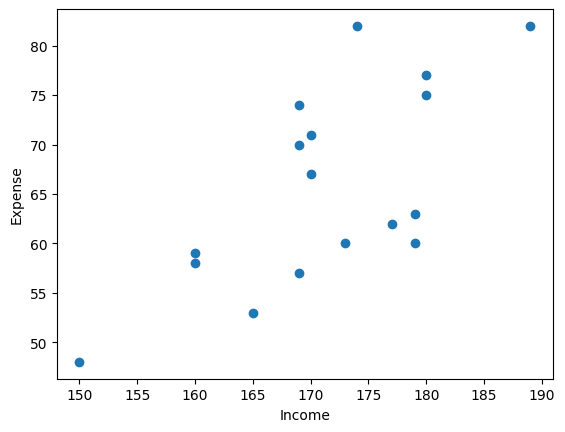

In [17]:
# Income, Expense 산점도로 표현
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter("Income", "Expense", data=df)
plt.xlabel("Income")
plt.ylabel("Expense")
plt.show()

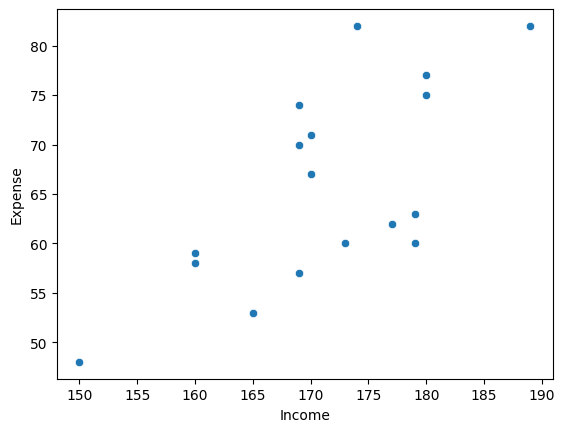

In [20]:
sns.scatterplot(x="Income", y="Expense", data=df)
plt.show()

In [ ]:
sns.jointplot(x="Income", y="Expense", data=df, kind='reg')

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(), annot=True)

In [27]:
# h0 : 상관계수 = 0 
# h1 : 상관계수 != 0

stats.pearsonr(df.Income, df.Expense)

# p-value가 0.002로 유의수준 0.05보다 작으므로 h0기각
# 상관계수 0.68은 통계적으로 유의하

PearsonRResult(statistic=0.6812956535794541, pvalue=0.0026006496946941993)

### [실습] 
다음의 데이터는 어떤 약품의 투여량과 투여된 실험대상이 청각신호에 반응하는데 걸리는 시간(초)을 기록한 데이터이다.
- 투여량 :    1,3,4,7,9,12,13,14
- 반응시간 : 3.5,2.4,2.1,1.3,1.2,2.2,2.6,4.2

(a) 상관계수 r을 계산하여라

(b) 산점도를 그리고, r이 두 변수 사이의 관계에 대한 적절한 척도인지 논의하여라




In [28]:
x =[ 1,3,4,7,9,12,13,14]
y = [3.5,2.4,2.1,1.3,1.2,2.2,2.6,4.2]

df = pd.DataFrame({"X": x, "Y":y})
df

,X,Y
0,1,3.5
1,3,2.4
2,4,2.1
3,7,1.3
4,9,1.2
5,12,2.2
6,13,2.6
7,14,4.2


In [29]:
df.corr()

,X,Y
X,1.000000,0.126743
Y,0.126743,1.000000


In [30]:
stats.pearsonr(df.X, df.Y)
# 상관계수(r) 0.126743은 통계적으로 유의하지 않다. 

PearsonRResult(statistic=0.12674322847596553, pvalue=0.7648891615834688)

<Axes: xlabel='X', ylabel='Y'>

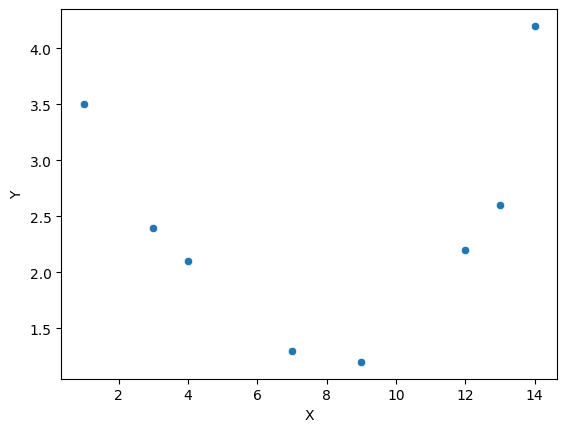

In [31]:
sns.scatterplot(x=df.X, y=df.Y)

### [실습]

이 데이터는 저콜레스테롤 식단의 효과를 분석하기 위하여 임의로 추출된 15명의 지원자들에게 4주간 이 식단을 제공한 후 그들의 콜레스테롤 감소량과 나이를 기록록한 데이터이다. 

(a) 이 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라. 귀무가설에 대한 검정결과를 서술하라.

(b) 이 데이터에서 27세에서 37세 사이의 5명을 제외한 나머지 10명의 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라

(c) (a)와 (b)에서 각각 구한 표본상관계수를 비교하여 설명하여라


In [32]:
# age_col.csv
df=pd.read_csv('/content/age_col.csv')
print(df.shape)

(15, 3)


In [33]:
df

,ID,age,decrease
0,1,45,30
1,2,37,55
2,3,22,28
3,4,43,52
4,5,34,25
5,6,58,44
6,7,46,45
7,8,30,30
8,9,60,61
9,10,49,38


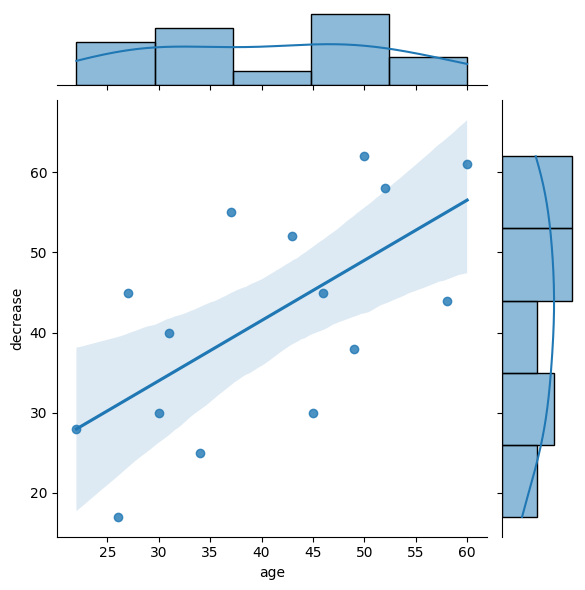

In [35]:
# (a) 이 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라. 귀무가설에 대한 검정결과를 서술하라.

#sns.scatterplot(x=df.age, y=df.decrease)
sns.jointplot(x=df.age, y=df.decrease, kind='reg')

In [36]:
stats.pearsonr(df.age, df.decrease)
# r = 0.648 , pvalue = 0.008 
# h0 : 모상관계수 = 0
# h1 : 모상관계수 != 0
# h0기각, r = 0.648 유의하다

PearsonRResult(statistic=0.6482752789349268, pvalue=0.00895171997907309)

In [38]:
# (b) 이 데이터에서 27세에서 37세 사이의 5명을 제외한 나머지 10명의 데이터를 이용하여 산점도와 표본상관계수 r을 구하여라

df1 = df[(df['age'] > 37)|(df['age'] < 27)]
df1.shape

(10, 3)

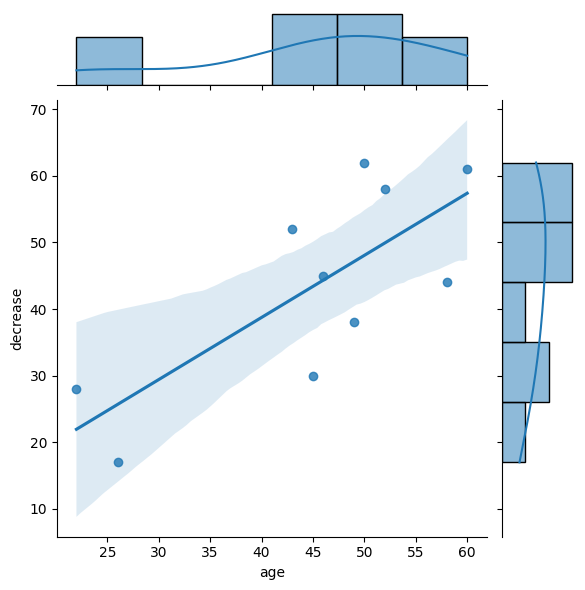

In [39]:
sns.jointplot(x=df1.age, y=df1.decrease, kind='reg')

In [40]:
stats.pearsonr(df1.age, df1.decrease)

PearsonRResult(statistic=0.7575101482288887, pvalue=0.01115455224706905)

In [ ]:
#(c) (a)와 (b)에서 각각 구한 표본상관계수를 비교하여 설명하여라